Q1. In the first matrix, there are n rows and k columns while in the second matrix has k rows and m columns. As per the matrix multiplication principle, in the first matrix first row will be multiplied with the first column of the secon matrix. All the elements are multiplied simulatenously. As per the question, there would be k multiplications and k-1 additions because all the k simultaneous products are added which involves k-1 times addition. This process is repeated with the same row and second column. Similarly it is done till mth column which gives km multiplication and (k-1)m addition. The whole process is then repeated for n rows one by which results in total **kmn multiplication and (k-1)mn addition**.


Q2.

In [37]:
import numpy as np
import time
def matrix_multi(a,b):
#inputs would be matrix in form of lists of list, below are the values extracted of no. of rows and columns of a and b matrix
  n=len(a)
  k=len(a[0])
  m=len(b[0])
#initialising matrix of n*m order by 0s to store the multiplication results
  ans=[]
  for i in range(n):
    row=[0]*m
    ans.append(row)
#using the approach as explained above
  for p in range(n):
    for q in range(m):
      for r in range(k):
        ans[p][q]=ans[p][q]+(a[p][r]*b[r][q])
  return ans
def matrix_np(a,b):
  ans=np.dot(a,b)
  return ans
#comparing both the results for correctness with example
a = np.random.randint(1, 100, (50,100) )
b = np.random.randint(1, 100, (100,50))

al=a.tolist()
bl=b.tolist()
ans1=matrix_multi(al,bl)
ans2=matrix_np(a,b)
print(ans1==ans2)
#comparing time
#with general approach
start_multi=time.time()
c1=matrix_multi(al,bl)
end_multi=time.time()
final_multi=end_multi-start_multi
#with numpy
start_multi_np=time.time()
c2=matrix_np(a,b)
end_multi_np=time.time()
final_multi_numpy=end_multi_np-start_multi_np
print(final_multi,final_multi_numpy)
print(final_multi>final_multi_numpy)


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
0.03078937530517578 0.00026869773864746094
True


The numpy approach works better than the traditional approach. It consumes less time for the same operation. Numpy is implemented in **C** which is a low level language. It uses optimized algorithms. Numpy uses parallelism which can also help in reducing the time. This difference of time between approaches is significantly observed for large arrays.

Q3. To find the median we would traverse the array n/2 times. So n elements would be traversed nearly n/2 times(depending on odd and even n). Therefore time complexity will be $O(n^2)$ by this approach. The other method could be to sort the array and then get the median. Here sorting would require O(nlogn) as time complexity and then we can get the median. Both the approaches are coded below

In [38]:
import time
import numpy as np
def median_pass(a):
  n=len(a)
  n1=n
  max1=float('-inf')
  max2=float('-inf')
  adrs=0
  if(n%2==0):
    for i in range((n+2)//2):
      max2=max1
      max1=float('-inf')
      for j in range(n1):
        if(max1>=a[j]):
          max1=max1
        else:
          max1=a[j]
          adrs=j
      if(adrs<len(a)):
        a.pop(adrs)
      n1=n1-1
  else:
    for i in range((n+1)//2):
      max1=float('-inf')
      for j in range(n1):
         if(max1>=a[j]):
          max1=max1
         else:
          max1=a[j]
          adrs=j
      if(adrs<len(a)):#to ensure the list does not go out of index
        a.pop(adrs)#removing the max elements from the list till we reach median
      n1=n1-1
  if(n%2==0):
    return ((max1+max2)/2)
  else:
    return max1


def median_sort(a):
    sorted_arr=sorted(a)
    n=len(sorted_arr)

    if n%2==0:
        max1=sorted_arr[n//2-1]
        max2=sorted_arr[n//2]
        median=(max1+max2)/2
    else:
        median=sorted_arr[n//2]
    return median


a = np.random.randint(1, 100, 50000)
a1=a.tolist()
#checking for correctness
print(median_pass(a1)==median_sort(a)==np.median(a))

start=time.time()
med1=median_pass(a1)
end=time.time()
t1=end-start

start1=time.time()
med2=median_sort(a1)
end1=time.time()
t2=end1-start1

start2=time.time()
med3=np.median(a1)
end2=time.time()
t3=end2-start2


print(t1,t2,t3)

True
10.139699697494507 0.0010466575622558594 0.0011501312255859375


The true indicates that all approach give correct median. After getting the results, we could see sorted approach is slightly better than numpy approach and the traditional approach takes significantly higher time.

Q4. $f(x,y)=x^2y+y^3sin(x)$

gradient wrt x

δf(x,y)/δ(x)=2xy+$y^3cos(x)$

gradient wrt y

δf(x,y)/δ(y)=$x^2$ +$3y^2sin(x)$







Q5.

In [39]:
import jax
import jax.numpy as jnp
import numpy as np

def my_function(x, y):
    return ((x**2)*y)+((y**3)*(jnp.sin(x)))

def wrtx(x,y):
    return ((2*x*y))+((y**3)*(jnp.cos(x)))

def wrty(x,y):
    return ((x*x))+(3*y*y*(jnp.sin(x)))

gradient_fn = jax.grad(my_function, argnums=(0, 1))

x=jnp.array(3.0)#integers are not considered as input, therefore float
y=jnp.array(4.0)
gradient_at_point =gradient_fn(x,y)

print("Input (x, y):",x,y)
#By JAX
print("Gradient:",gradient_at_point)
#By function
print("Gradient from function:",wrtx(x,y),',',wrty(x,y))

Input (x, y): 3.0 4.0
Gradient: (Array(-39.35952, dtype=float32, weak_type=True), Array(15.77376, dtype=float32, weak_type=True))
Gradient from function: -39.35952 , 15.77376


The x,y component values comes out to be same with both the approaches.

Q6.

In [40]:
import sympy as sp
x,y=sp.symbols('x y')
f=((x**2)*y)+((y**3)*(sp.sin(x)))
gradient=[sp.diff(f,var) for var in (x,y)]
print(gradient)

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


We get similar gradient from sympy, the functions come out to be same as defined in Q4. Therefore gradient is now verified from both sympy and jax

Q7.

In [41]:
marks={
    '1. 2022': {
        'Branch 1': {
            'Roll Number':21110053,'Name':'Deven','Marks':{
                'Maths':80,'English':70
            }
        }
        ,'Branch 2': None
    }
    ,'2. 2023':{
        'Branch 1':None,'Branch 2':None
    }
    ,'3. 2024':{
        'Branch 1':None,'Branch 2':None
    }
    ,'4. 2025':{
        'Branch 1':None,'Branch 2':None
    }
}
print(marks)

{'1. 2022': {'Branch 1': {'Roll Number': 21110053, 'Name': 'Deven', 'Marks': {'Maths': 80, 'English': 70}}, 'Branch 2': None}, '2. 2023': {'Branch 1': None, 'Branch 2': None}, '3. 2024': {'Branch 1': None, 'Branch 2': None}, '4. 2025': {'Branch 1': None, 'Branch 2': None}}


Nested dictionary could be made as written above. I have assigned values none to avoid repetition of data.

Q8

In [42]:
class marks:
  def __init__(self,english,maths):
    self.english=english
    self.maths=maths
  def __str__(self):
    return f"English:{self.english}, Maths:{self.maths}"

class student:
  def __init__(self,name,rollno,marks):
    self.name=name
    self.rollno=rollno
    self.marks=marks
  def __str__(self):
    return f"Name:{self.name},Rollno:{self.rollno},Marks:{self.marks}"

class branch:
  def __init__(self,name,student):
    self.name=name
    self.student=student
  def __str__(self):
    return f"Branch Name:{self.name},Student:{self.student}"

class year:
  def __init__(self,year_n,branch):
    self.year_n=year_n
    self.branch=branch
  def __str__(self):
    return f"Year:{self.year_n},branch:{self.branch}"

class final:
  def __init__(self,year_n):
    self.year_n=year_n
  def __str__(self):
    return f"Year:{self.year_n}"

marks1=marks(80,90)
marks2=marks(50,100)
student1=student("Deven","21110053",marks1)
student2=student("Yash","21110244",marks2)
branch1=branch("Computer Science",student1)
branch2=branch("Electrical Engineering",student2)
year1=year(2021,branch1)
year2=year(2022,branch2)
final=final([year1,year2])
print(final)
print(year1)
print(branch1)
print(student1)

Year:[<__main__.year object at 0x7c5517f46ce0>, <__main__.year object at 0x7c5517f46cb0>]
Year:2021,branch:Branch Name:Computer Science,Student:Name:Deven,Rollno:21110053,Marks:English:80, Maths:90
Branch Name:Computer Science,Student:Name:Deven,Rollno:21110053,Marks:English:80, Maths:90
Name:Deven,Rollno:21110053,Marks:English:80, Maths:90


In the above format we could store data in form of classes

Q9

Text(0.5, 1.0, 'Plot of $e^x$')

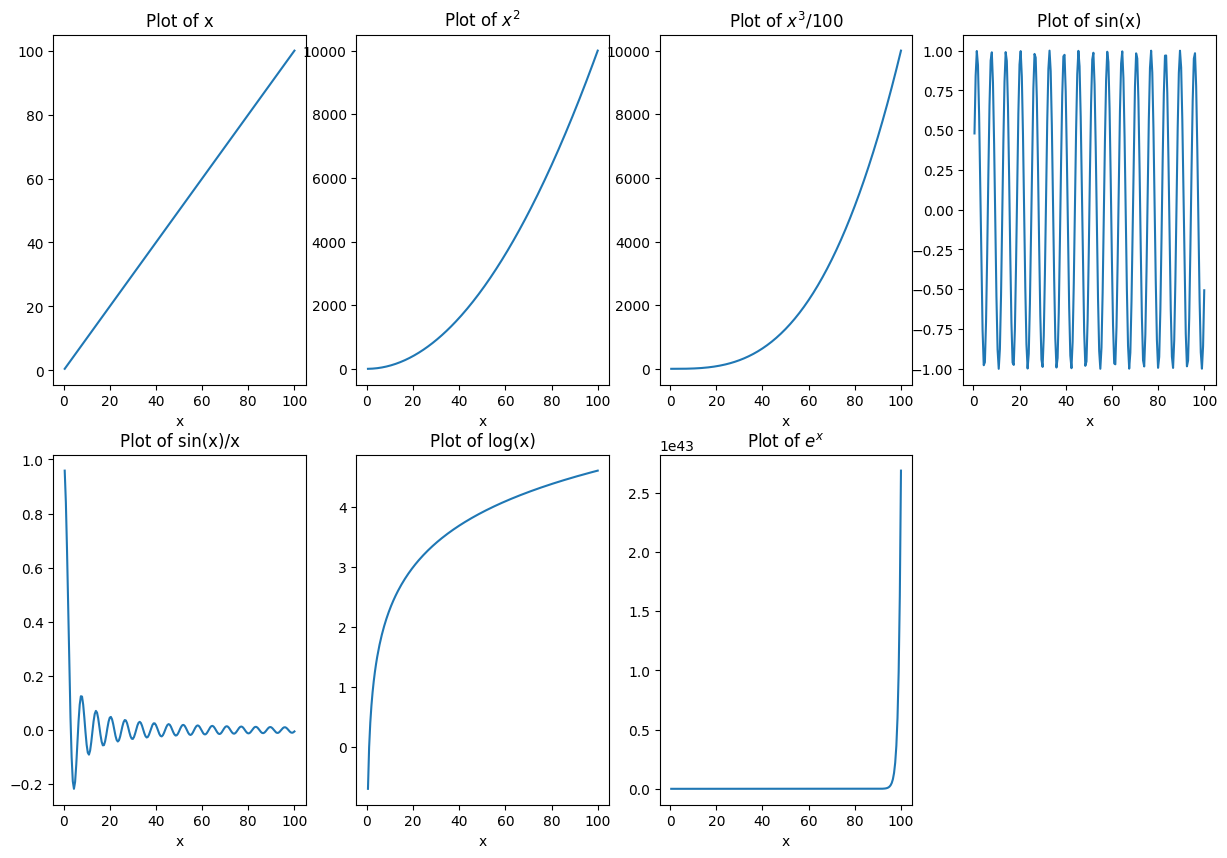

In [43]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.4,0.5)
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.plot(x,x)
plt.xlabel('x')
plt.title('Plot of x')

plt.subplot(2, 4, 2)
plt.plot(x,x*x)
plt.xlabel('x')
plt.title('Plot of $x^2$')

plt.subplot(2,4,3)
plt.plot(x,(x**3)/100)
plt.xlabel('x')
plt.title('Plot of $x^3/100$')

plt.subplot(2,4,4)
plt.plot(x,np.sin(x))
plt.xlabel('x')
plt.title('Plot of sin(x)')

plt.subplot(2,4,5)
plt.plot(x,np.sin(x)/x)
plt.xlabel('x')
plt.title('Plot of sin(x)/x')

plt.subplot(2,4,6)
plt.plot(x,np.log(x))
plt.xlabel('x')
plt.title('Plot of log(x)')

plt.subplot(2,4,7)
plt.plot(x,np.exp(x))
plt.xlabel('x')
plt.title('Plot of $e^x$')

Q10.

In [44]:
import numpy as np
import pandas as pd
mat=np.random.uniform(1,2,(20,5))
df=pd.DataFrame(mat, columns=['a','b','c','d','e'])
print(df)
#standard deviation
std=df.std()
maxsd=0
id=0
print(std)#printing std for all columns
for i in range(len(std)):
  if(maxsd>std[i]):
    maxsd=maxsd
  else:
    maxsd=std[i]
    id=i

output={0:"a",1:"b",2:"c",3:"d",4:"e"}#to map index with the column names
print('Column with highest standard deviation: ',output[id])
#lowest mean
mean=df.mean()
print(mean)#printing means for all columns
lmean=5
id1=0
for i in range(len(mean)):
  if(mean[i]<lmean):
    lmean=mean[i]
    id1=i
print('Column with lowest mean: ',output[id1])

           a         b         c         d         e
0   1.169926  1.065853  1.869935  1.119202  1.815638
1   1.219602  1.213080  1.364226  1.443796  1.283487
2   1.412360  1.525058  1.417650  1.720683  1.177436
3   1.337044  1.861427  1.781778  1.753905  1.722031
4   1.546914  1.871028  1.875895  1.187437  1.211151
5   1.892007  1.161548  1.191574  1.384674  1.612284
6   1.420453  1.997448  1.890233  1.126032  1.033640
7   1.177936  1.885154  1.231553  1.680474  1.798868
8   1.567220  1.913870  1.115018  1.823425  1.913305
9   1.024409  1.297364  1.933496  1.376710  1.854643
10  1.154230  1.831933  1.733717  1.730419  1.602467
11  1.095275  1.240245  1.603933  1.943445  1.678284
12  1.697212  1.496590  1.661452  1.011431  1.936263
13  1.628396  1.660996  1.334144  1.187910  1.986020
14  1.427744  1.305756  1.385566  1.584098  1.297723
15  1.784588  1.914000  1.044325  1.425312  1.107492
16  1.484167  1.918318  1.253422  1.260495  1.654672
17  1.639045  1.021887  1.949305  1.744660  1.

Q11.

In [45]:
df['f']=df.sum(axis=1)#adding across a row


In [46]:
df#data frame visualisation after adding f row

,a,b,c,d,e,f
0,1.169926,1.065853,1.869935,1.119202,1.815638,7.040554
1,1.219602,1.213080,1.364226,1.443796,1.283487,6.524190
2,1.412360,1.525058,1.417650,1.720683,1.177436,7.253187
3,1.337044,1.861427,1.781778,1.753905,1.722031,8.456185
4,1.546914,1.871028,1.875895,1.187437,1.211151,7.692426
5,1.892007,1.161548,1.191574,1.384674,1.612284,7.242087
6,1.420453,1.997448,1.890233,1.126032,1.033640,7.467805
7,1.177936,1.885154,1.231553,1.680474,1.798868,7.773985
8,1.567220,1.913870,1.115018,1.823425,1.913305,8.332838
9,1.024409,1.297364,1.933496,1.376710,1.854643,7.486622


In [47]:
df['g']=[0]*20
for i in range(len(df['f'])):
  if(df['f'][i]<8):
    df['g'][i]='LT8'
  else:
    df['g'][i]='GT8'
ctr=0
for i in range(len(df['g'])):
  if(df['g'][i]=='LT8'):
    ctr=ctr+1
print('No. of rows corresponding to LT8: ',ctr)
df1=pd.Series()
df2=pd.Series()

for i in range(len(df['g'])):
  if (df['g'][i]=='LT8'):
    df1 = pd.concat([df1, pd.Series(df['f'][i])], ignore_index=True)
  else:
    df2 = pd.concat([df2, pd.Series(df['f'][i])], ignore_index=True)

print("Standard Deviation for LT8: ",df1.std())
print("Standard Deviation for GT8: ",df2.std())



No. of rows corresponding to LT8:  14
Standard Deviation for LT8:  0.36476337711438944
Standard Deviation for GT8:  0.19124900293188438


<ipython-input-47-d9e4f5cf7c1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g'][i]='LT8'
<ipython-input-47-d9e4f5cf7c1f>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1=pd.Series()
<ipython-input-47-d9e4f5cf7c1f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2=pd.Series()


Q12. Broadcasting in numpy eases the task of reshaping the array while operating with arrays for us. It allows for element wise operations between different number of arrays.

In [48]:
import numpy as np
a=np.array([[1,2],[3,4]])
b=np.array([1,2])
c=a+b#adding arrays of different sizes
print("Answer due to broadcasting ",c)



Answer due to broadcasting  [[2 4]
 [4 6]]


Here we can see both the arrays have different sizes, still we do not get an error in computing c. This is because of broadcasting.

Q13.

In [49]:
def min_index(a):
  ind=0
  min=float('inf')
  for i in range(len(a)):
    if(a[i]<=min):
      min=a[i]
      ind=i
  return ind

arr=np.array([1,2,3,-9,-100])
min_ind=min_index(arr)
#verifying the result with argmin function
print(min_ind==np.argmin(arr))



True
